### Column Descriptions


## People

    ID: Customer's unique identifier
    Year_Birth: Customer's birth year
    Education: Customer's education level
    Marital_Status: Customer's marital status
    Income: Customer's yearly household income
    Kidhome: Number of children in customer's household
    Teenhome: Number of teenagers in customer's household
    Dt_Customer: Date of customer's enrollment with the company
    Recency: Number of days since customer's last purchase
    Complain: 1 if the customer complained in the last 2 years, 0 otherwise

## Products

    MntWines: Amount spent on wine in last 2 years
    MntFruits: Amount spent on fruits in last 2 years
    MntMeatProducts: Amount spent on meat in last 2 years
    MntFishProducts: Amount spent on fish in last 2 years
    MntSweetProducts: Amount spent on sweets in last 2 years
    MntGoldProds: Amount spent on gold in last 2 years

## Promotion

    NumDealsPurchases: Number of purchases made with a discount
    AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

## Place

    NumWebPurchases: Number of purchases made through the company's website
    NumCatalogPurchases: Number of purchases made using a catalogue
    NumStorePurchases: Number of purchases made directly in stores
    NumWebVisitsMonth: Number of visits to company’s website in the last month


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Data collection and Analysis

In [44]:
customer_data = pd.read_csv('dataset/marketing_campaign.csv', sep=';')

In [45]:
# First 5 rows
customer_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [46]:
# Number of rows and columns
customer_data.shape

(2240, 29)

## Exploratory Analysis

In [47]:
# Getting some information about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [48]:
# Checking for missing values
customer_data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

There are some missing **Income** values.

In [49]:
customer_data.describe(include="all")

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,2012-08-31,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


The columns Z_CostContact and Z_Revenue have the same max and min, which means all the values are the same. Plus there isn't information about what those columns mean so they will be removed.
The ID column won't be necessary either.

In [50]:
customer_data.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [51]:
customer_data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,3,6,5,0,0,0,0,0,0,0


### Converting Dt_Customer to timestamps

In [52]:
dt_customer_as_date = pd.to_datetime(customer_data['Dt_Customer'])

In [53]:
customer_data['Dt_Customer'] = dt_customer_as_date.apply(lambda x: x.timestamp())

In [54]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   float64
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

### Re-Ordering Columns

In [55]:
new_order = ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Complain', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Response']

In [56]:
customer_data_ordered = customer_data[new_order]

In [57]:
customer_data_ordered.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Complain', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Response'],
      dtype='object')

In [58]:
customer_data_ordered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   float64
 7   Recency              2240 non-null   int64  
 8   Complain             2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Checking distribution and outliers

### Year of Birth

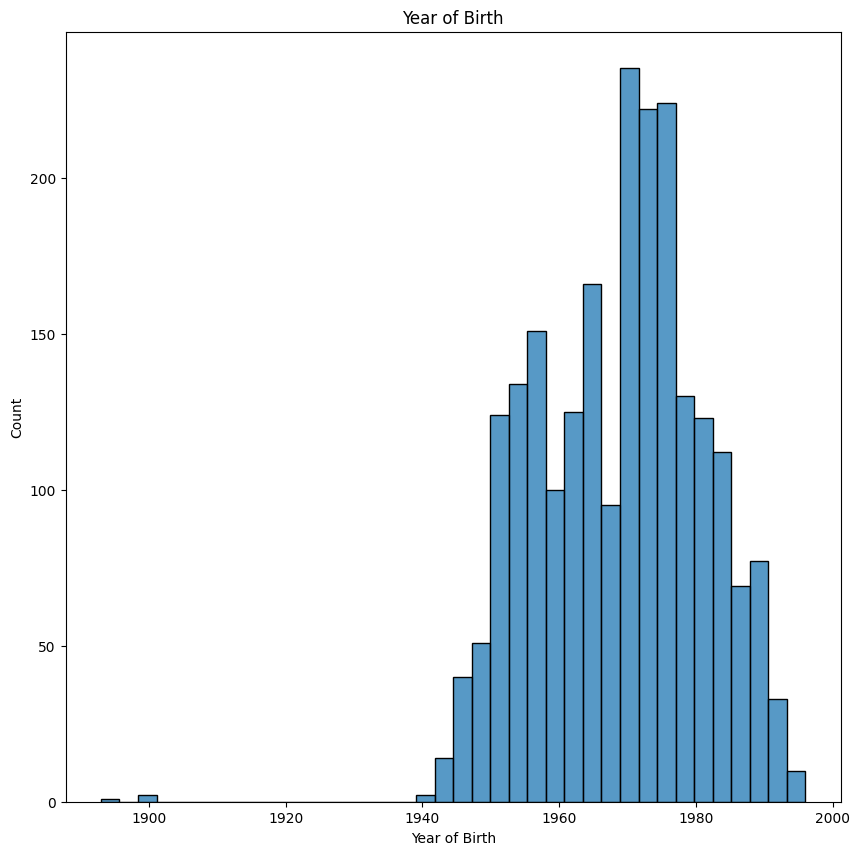

In [59]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='Year_Birth')
plt.title('Year of Birth')
plt.xlabel('Year of Birth')
plt.ylabel('Count')
plt.show()

In [60]:
customer_data_ordered.loc[customer_data_ordered['Year_Birth'] < 1940]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
192,1900,2n Cycle,Divorced,36640.0,1,0,1.380154e+09,99,1,15,...,2,1,2,5,0,0,0,0,0,0
239,1893,2n Cycle,Single,60182.0,0,1,1.400285e+09,23,0,8,...,1,0,2,4,0,0,0,0,0,0
339,1899,PhD,Together,83532.0,0,0,1.380154e+09,36,0,755,...,4,6,4,1,0,0,0,0,1,0


**There are 3 clients with a year of birth below 1940, they will be removed.**

In [61]:
customer_data_ordered = customer_data_ordered[customer_data_ordered['Year_Birth'] >= 1940]

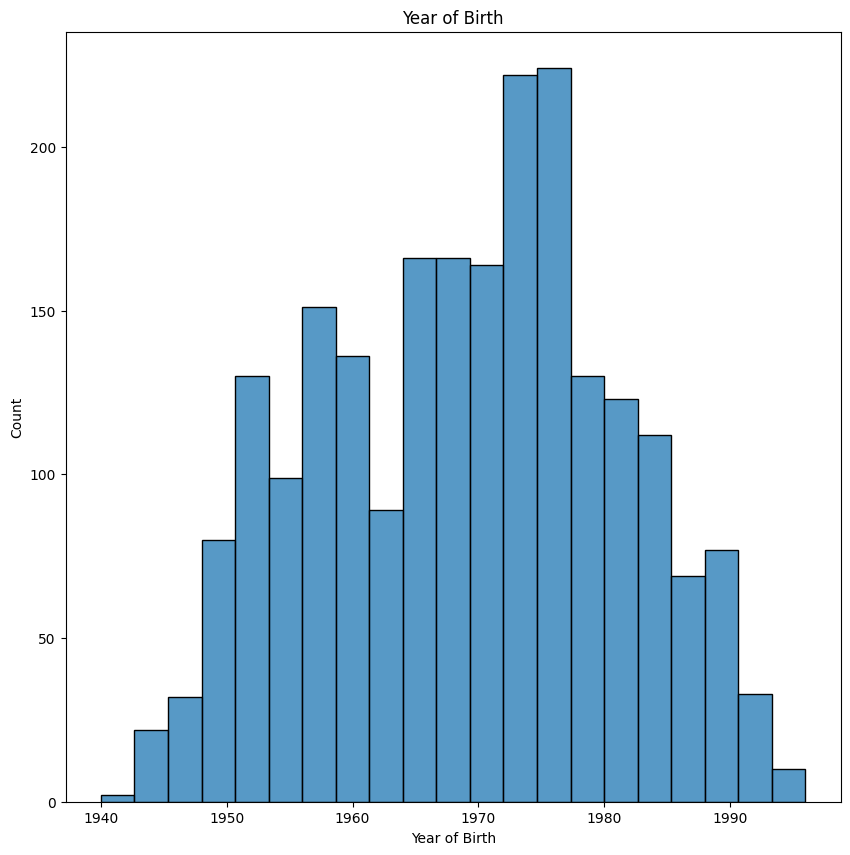

In [62]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='Year_Birth')
plt.title('Year of Birth')
plt.xlabel('Year of Birth')
plt.ylabel('Count')
plt.show()

### Education

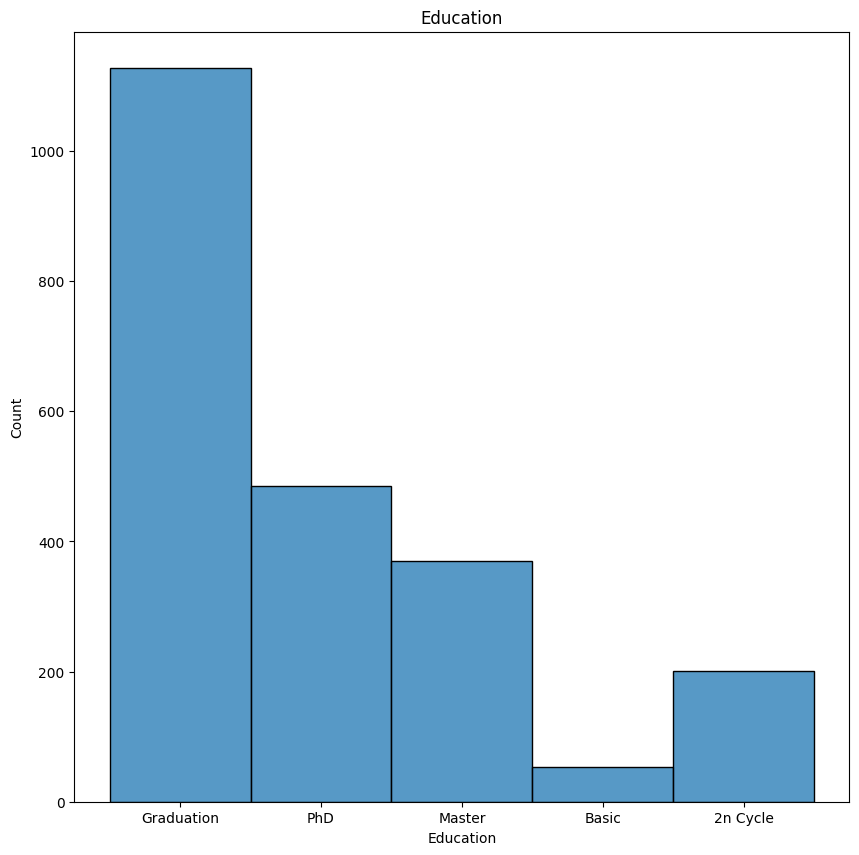

In [63]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='Education')
plt.title('Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

**Most customers have a Graduation level.**

### Marital Status

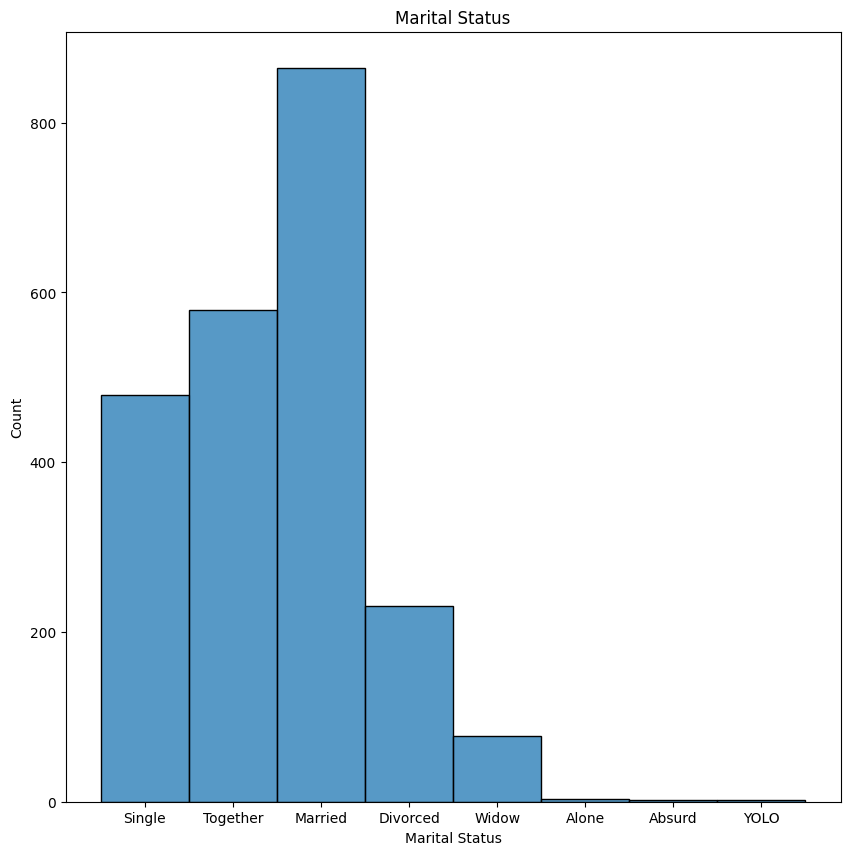

In [64]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='Marital_Status')
plt.title('Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

The Alone, Absurd and YOLO statuses will be replaced by single.

In [65]:
customer_data_ordered['Marital_Status'].replace({'Alone': 'Single', 'Absurd': 'Single', 'YOLO': 'Single'})

0         Single
1         Single
2       Together
3       Together
4        Married
          ...   
2235     Married
2236    Together
2237    Divorced
2238    Together
2239     Married
Name: Marital_Status, Length: 2237, dtype: object

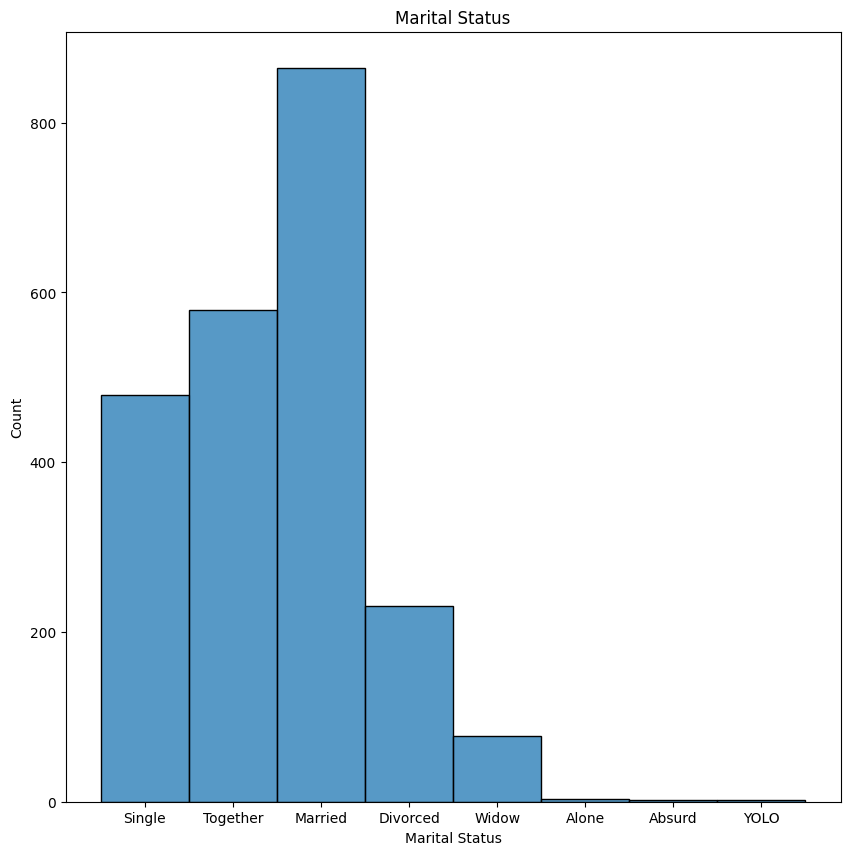

In [66]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='Marital_Status')
plt.title('Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

### Income

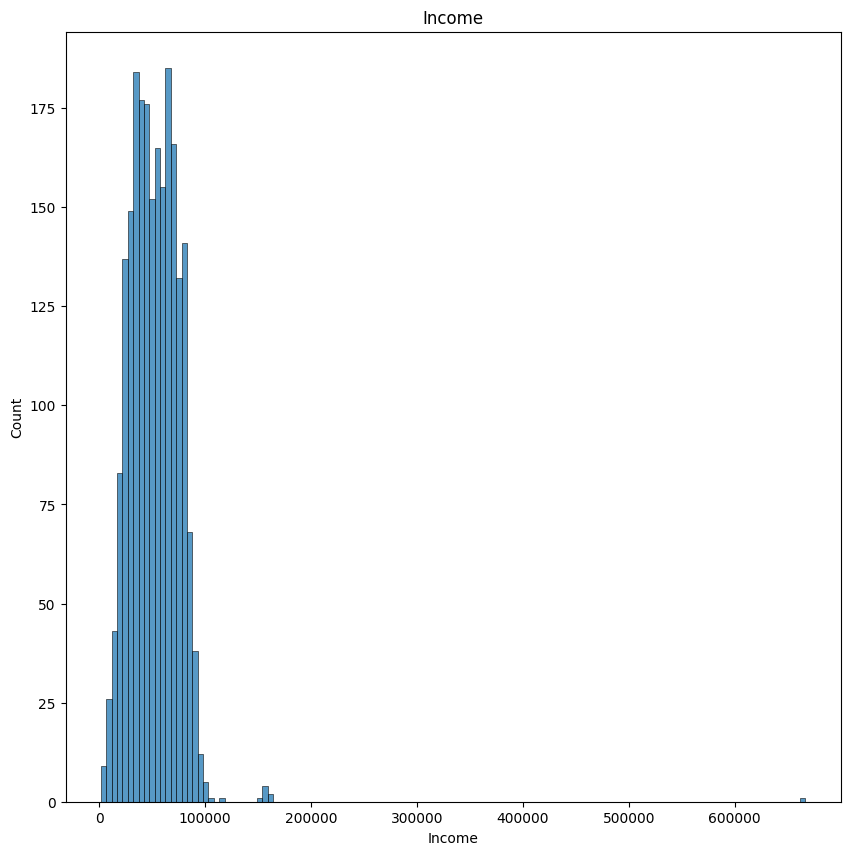

In [67]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='Income')
plt.title('Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

In [69]:
customer_data_ordered.loc[customer_data_ordered['Income'] > 600000]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
2233,1977,Graduation,Together,666666.0,1,0,1.370131e+09,23,0,9,...,3,1,3,6,0,0,0,0,0,0


**There is one client with and income higher than 600.000, he will be removed as K-Means doesn't work very well with outliers.**

In [70]:
customer_data_ordered = customer_data_ordered[customer_data_ordered['Income'] < 600000]

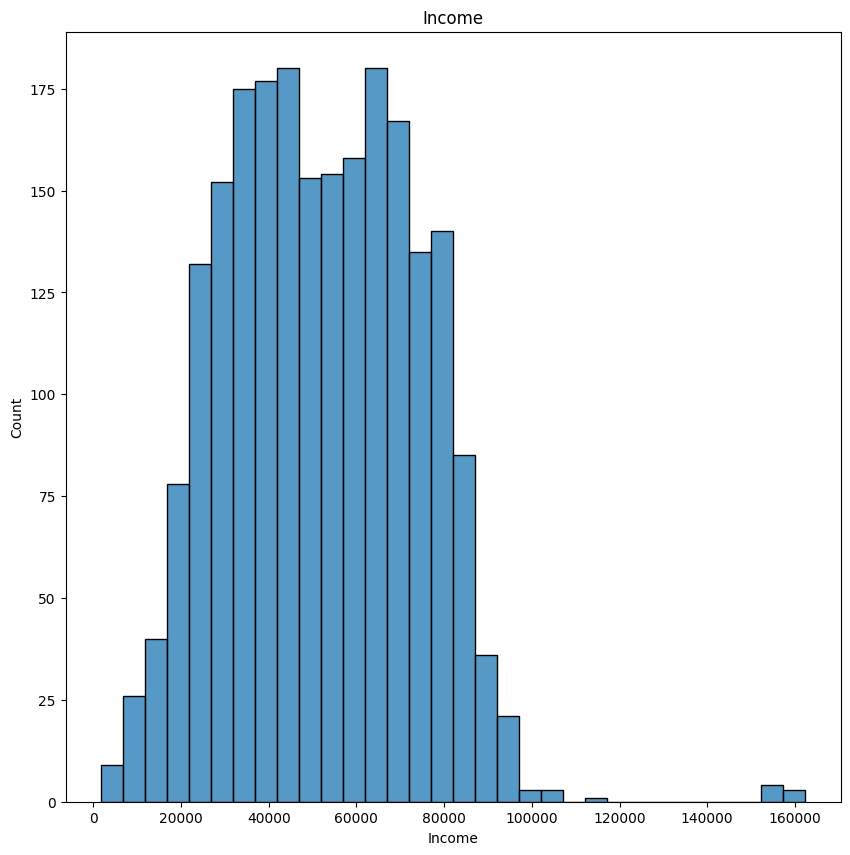

In [71]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='Income')
plt.title('Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

**There are other clients above 150.000 that might be considered outliers, but will be kept for now and treated as high income clients.**

### Kid Home

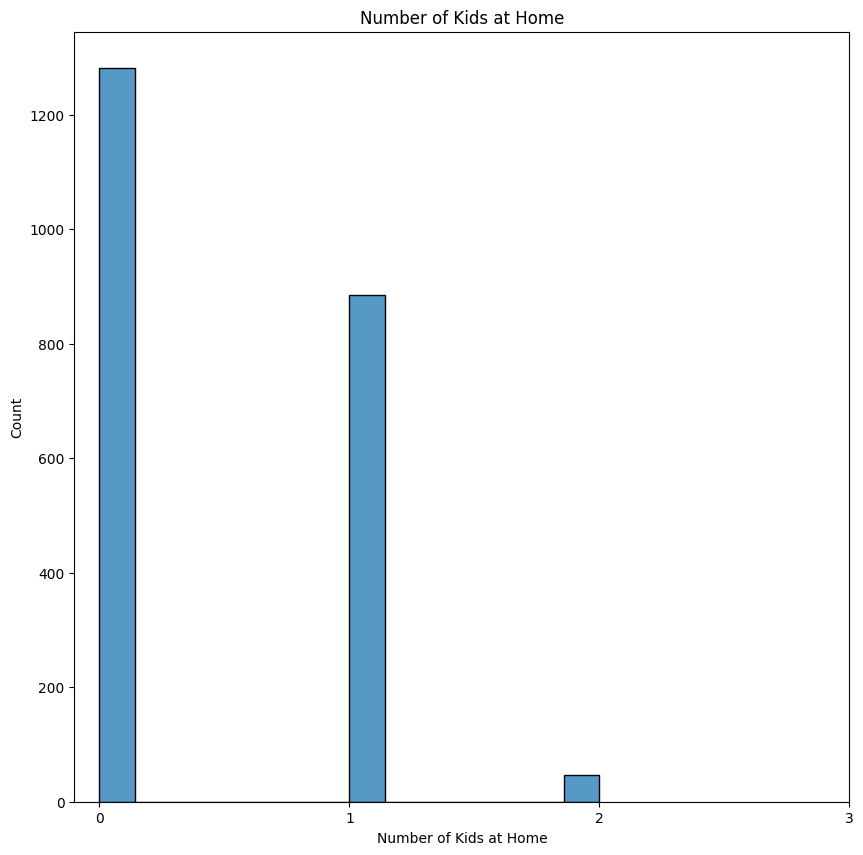

In [122]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='Kidhome')
plt.title('Number of Kids at Home')
plt.xlabel('Number of Kids at Home')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3])
plt.show()

**The number of kids at home is rather low and most clients don't have any.**

### Teen Home

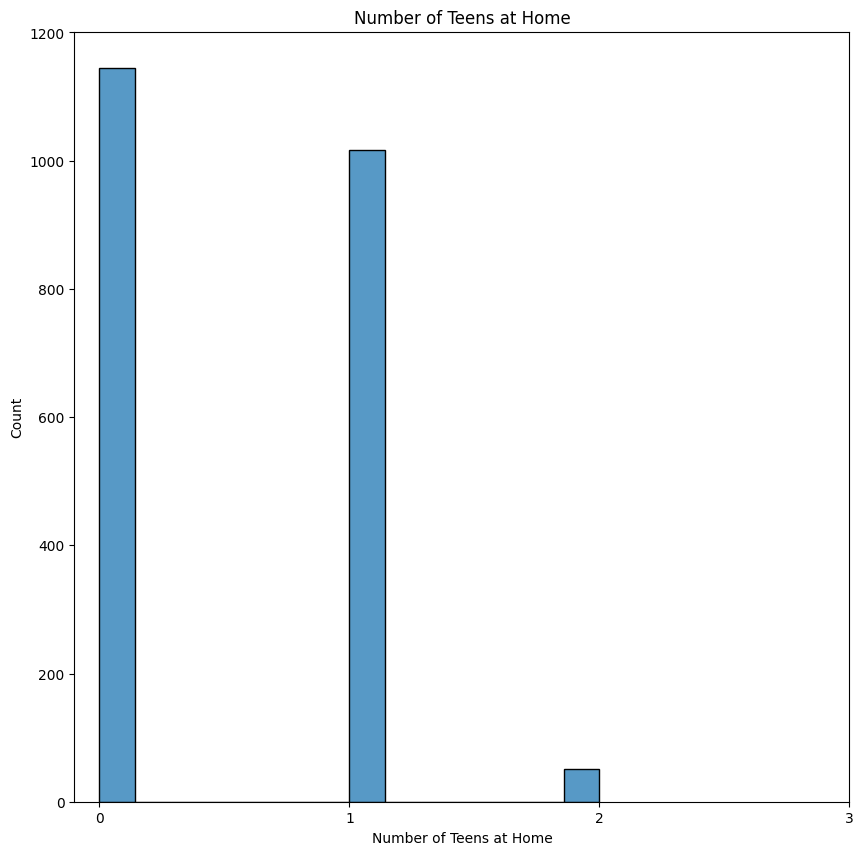

In [123]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='Teenhome')
plt.title('Number of Teens at Home')
plt.xlabel('Number of Teens at Home')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3])
plt.show()

**Similar as the kids at home, the numbers are rather low and most clients don't have teens either.**

#### Comparative table Kids vs Teens

In [76]:
kid_count = customer_data_ordered['Kidhome'].value_counts()
teen_count = customer_data_ordered['Teenhome'].value_counts()

kid_vs_teen = pd.concat([kid_count, teen_count], axis=1)
kid_vs_teen.columns = ['Number of Kids', 'Number of Teens']
kid_vs_teen

,Number of Kids,Number of Teens
0,1281,1144
1,885,1017
2,46,51


**Overall there are more clients with no kids or teens, but among the clients with children the teens numbers are a bit higher.**

### Date of Enrollment

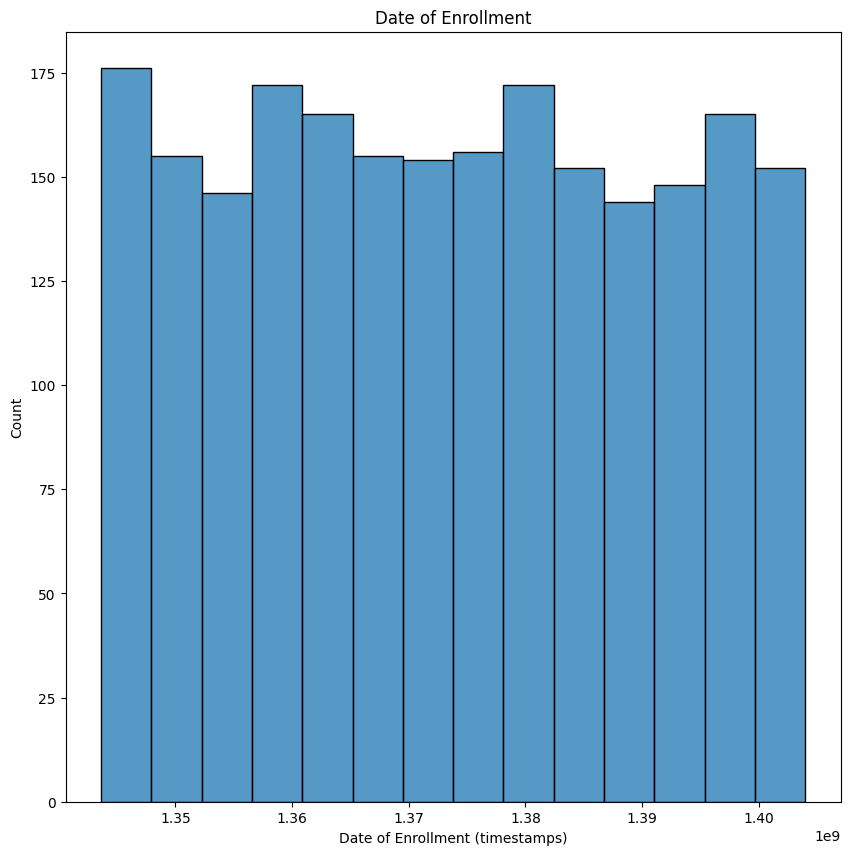

In [77]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='Dt_Customer')
plt.title('Date of Enrollment')
plt.xlabel('Date of Enrollment (timestamps)')
plt.ylabel('Count')
plt.show()

**Very evenly distributed.**

## Recency

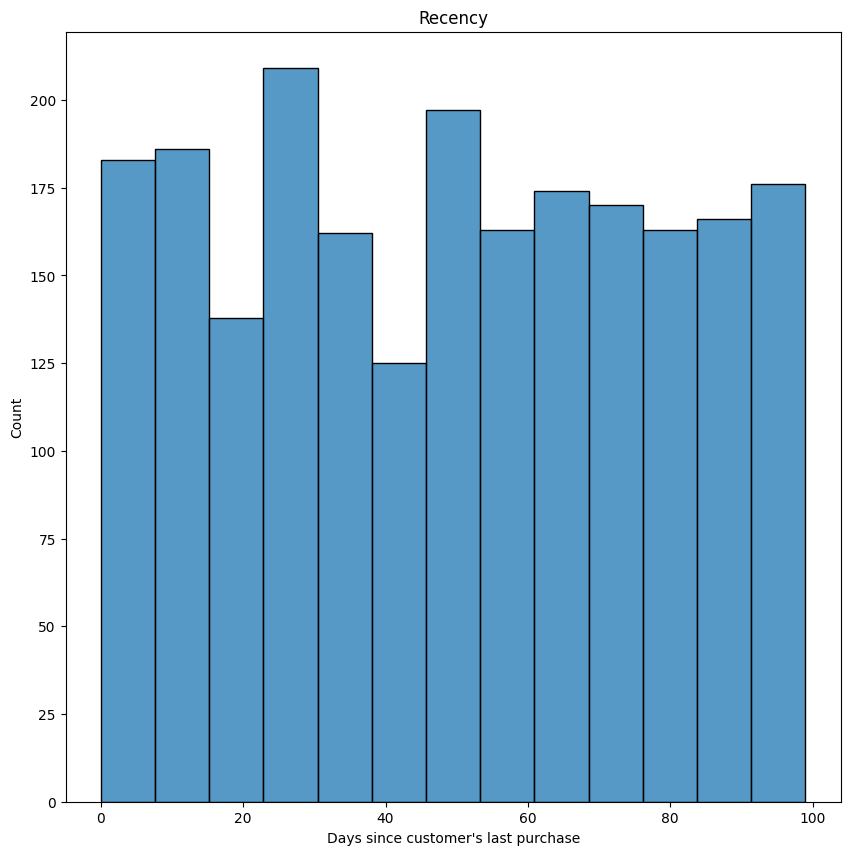

In [78]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='Recency')
plt.title('Recency')
plt.xlabel('Days since customer\'s last purchase')
plt.ylabel('Count')
plt.show()

**Very evenly distributed.**

### Complain

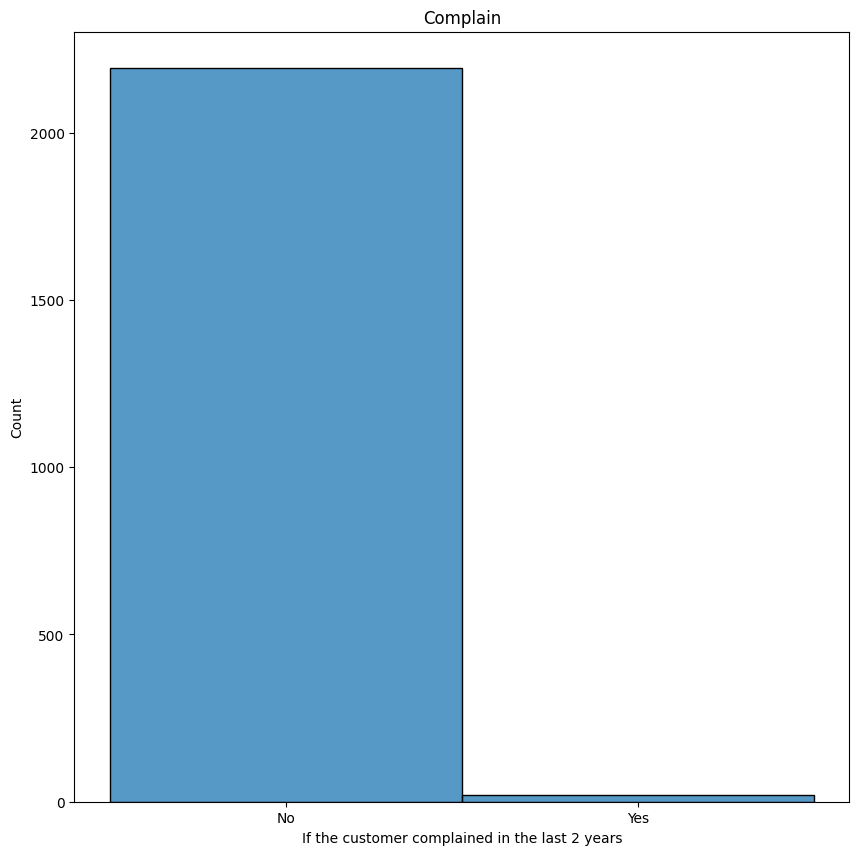

In [126]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='Complain', bins=2, binrange=(-0.5, 1.5))
plt.title('Complain')
plt.xlabel('If the customer complained in the last 2 years')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

**Most clients didn't complain.**

### MntWines

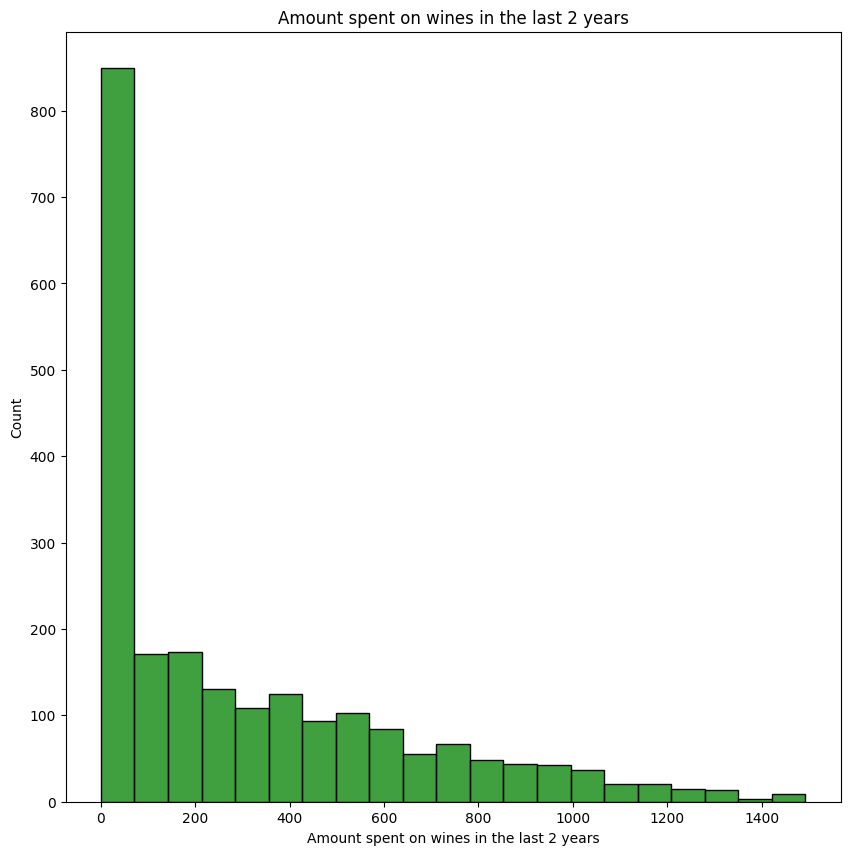

In [83]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='MntWines', color='green')
plt.title('Amount spent on wines in the last 2 years')
plt.xlabel('Amount spent on wines in the last 2 years')
plt.ylabel('Count')
plt.show()

### MntFruits

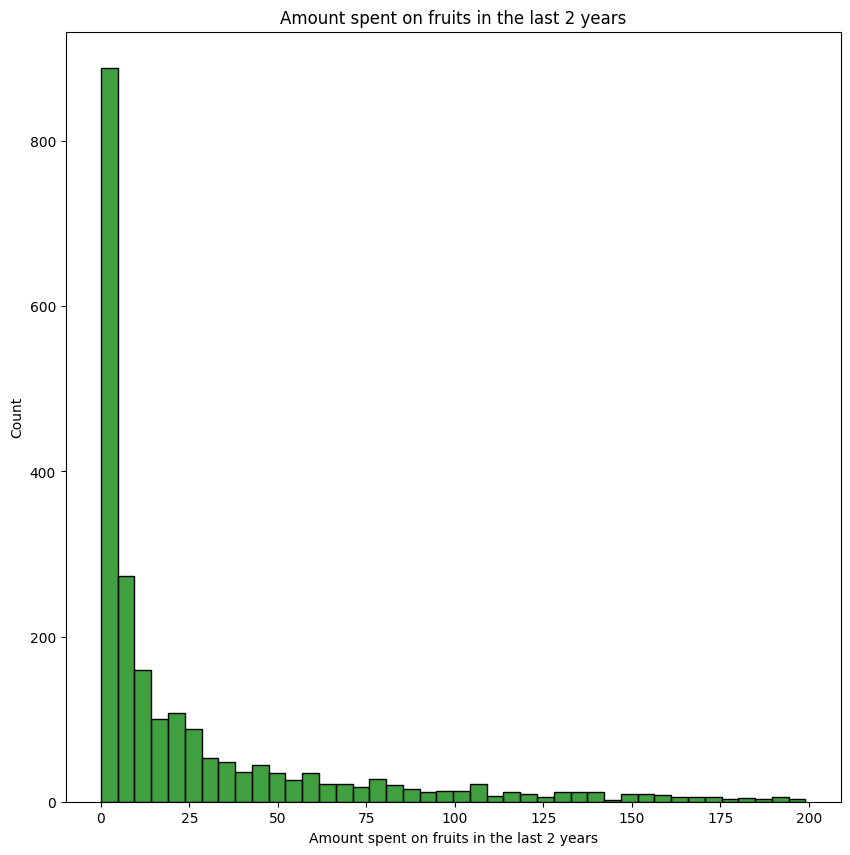

In [84]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='MntFruits', color='green')
plt.title('Amount spent on fruits in the last 2 years')
plt.xlabel('Amount spent on fruits in the last 2 years')
plt.ylabel('Count')
plt.show()

### MntMeatProducts

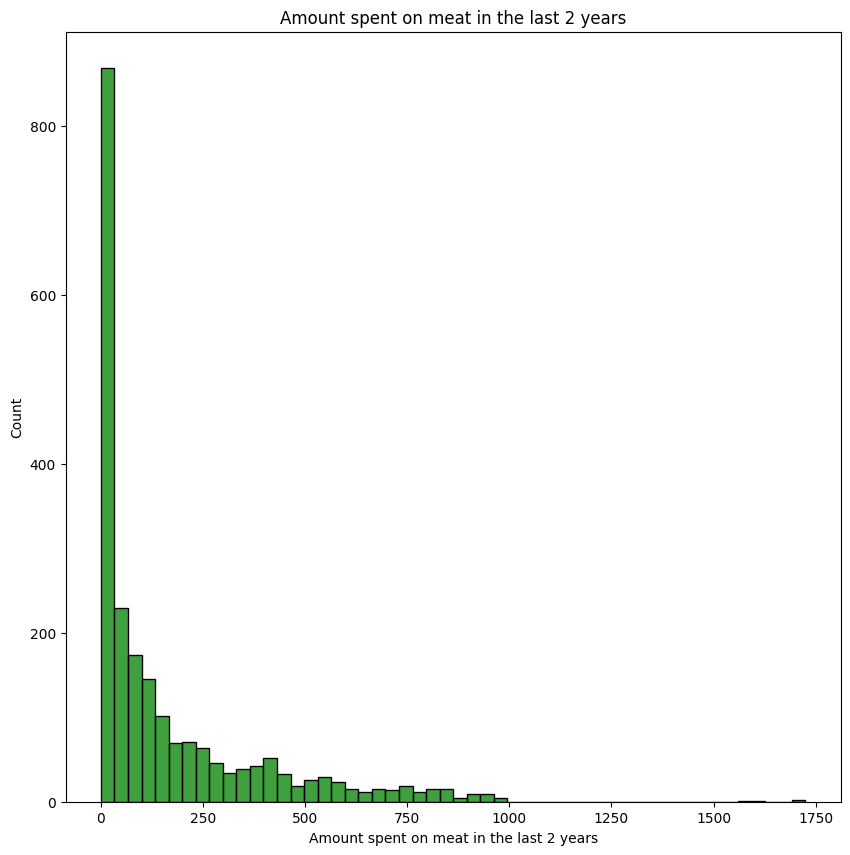

In [85]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='MntMeatProducts', color='green')
plt.title('Amount spent on meat in the last 2 years')
plt.xlabel('Amount spent on meat in the last 2 years')
plt.ylabel('Count')
plt.show()

In [89]:
customer_data_ordered[customer_data_ordered['MntMeatProducts'] > 1000]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
21,1979,Graduation,Married,2447.0,1,0,1.357430e+09,42,0,1,...,0,28,0,1,0,0,0,0,0,0
164,1973,PhD,Married,157243.0,0,1,1.393632e+09,98,0,20,...,0,22,0,0,0,0,0,0,0,0
687,1982,PhD,Married,160803.0,0,0,1.344038e+09,21,0,55,...,0,28,1,0,0,0,0,0,0,0
1653,1977,Graduation,Together,157146.0,0,0,1.367194e+09,13,0,1,...,0,28,0,1,0,0,0,0,0,0


**4 Clients that might be outliers, but will be kept for now as they might be big spenders on meat.**

### MntFishProducts

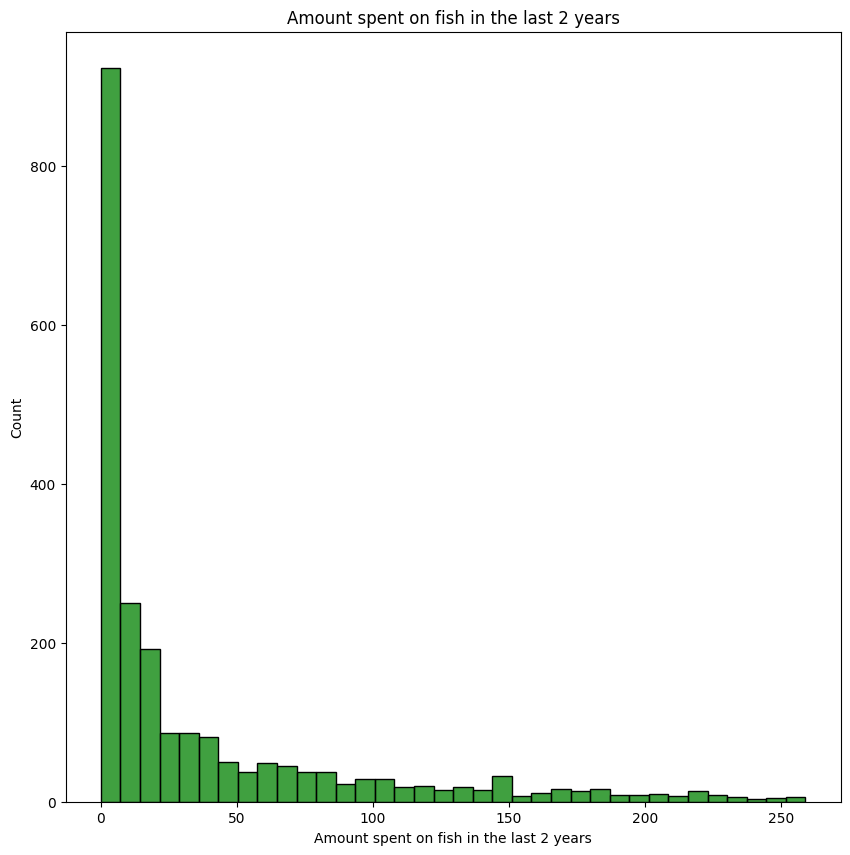

In [90]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='MntFishProducts', color='green')
plt.title('Amount spent on fish in the last 2 years')
plt.xlabel('Amount spent on fish in the last 2 years')
plt.ylabel('Count')
plt.show()

### MntSweetProducts

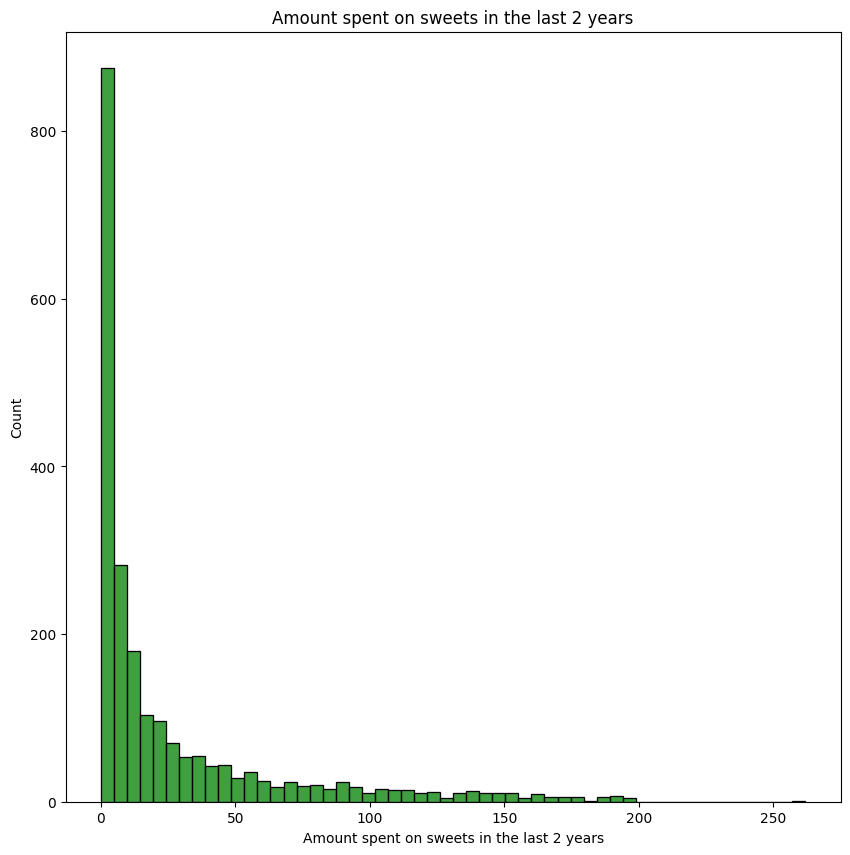

In [91]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='MntSweetProducts', color='green')
plt.title('Amount spent on sweets in the last 2 years')
plt.xlabel('Amount spent on sweets in the last 2 years')
plt.ylabel('Count')
plt.show()

In [92]:
customer_data_ordered[customer_data_ordered['MntSweetProducts'] > 200]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
1898,1945,PhD,Single,113734.0,0,0,1.401235e+09,9,0,6,...,27,0,0,1,0,0,0,0,0,0


**One client that might be an outlier, but for now will be kept as he could be a high spender.**

### MntGoldProds

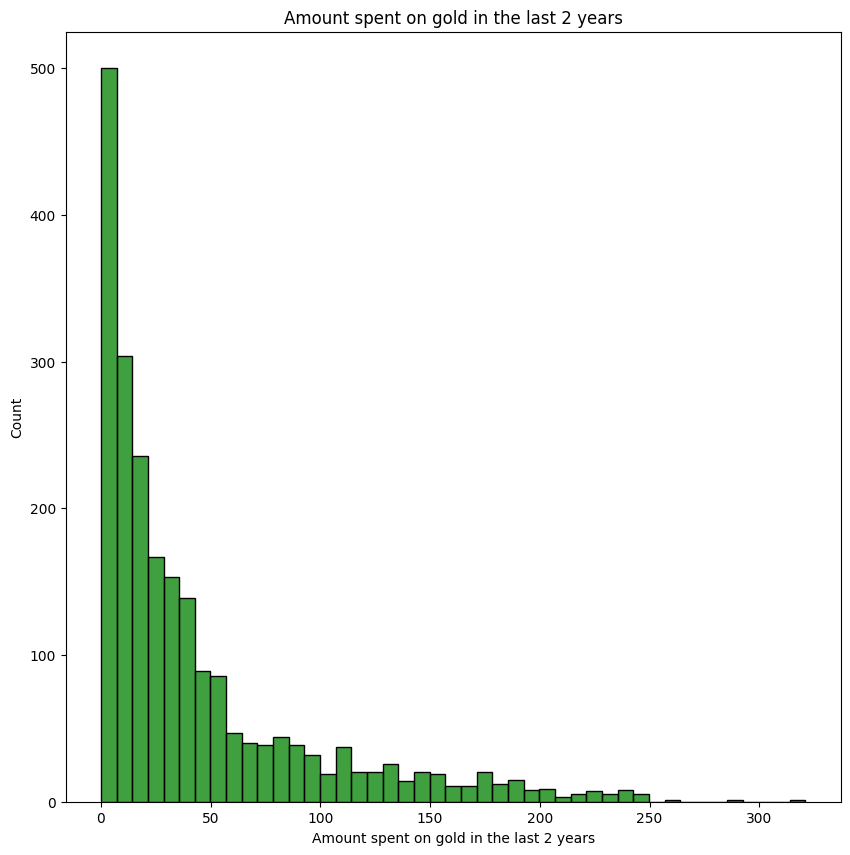

In [93]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='MntGoldProds', color='green')
plt.title('Amount spent on gold in the last 2 years')
plt.xlabel('Amount spent on gold in the last 2 years')
plt.ylabel('Count')
plt.show()

**Overall the product columns have similar distributions. There are some clients that might be outliers and this will be kept in mind while the model is generated and will be removed if necessary.** 

### NumDealsPurchases

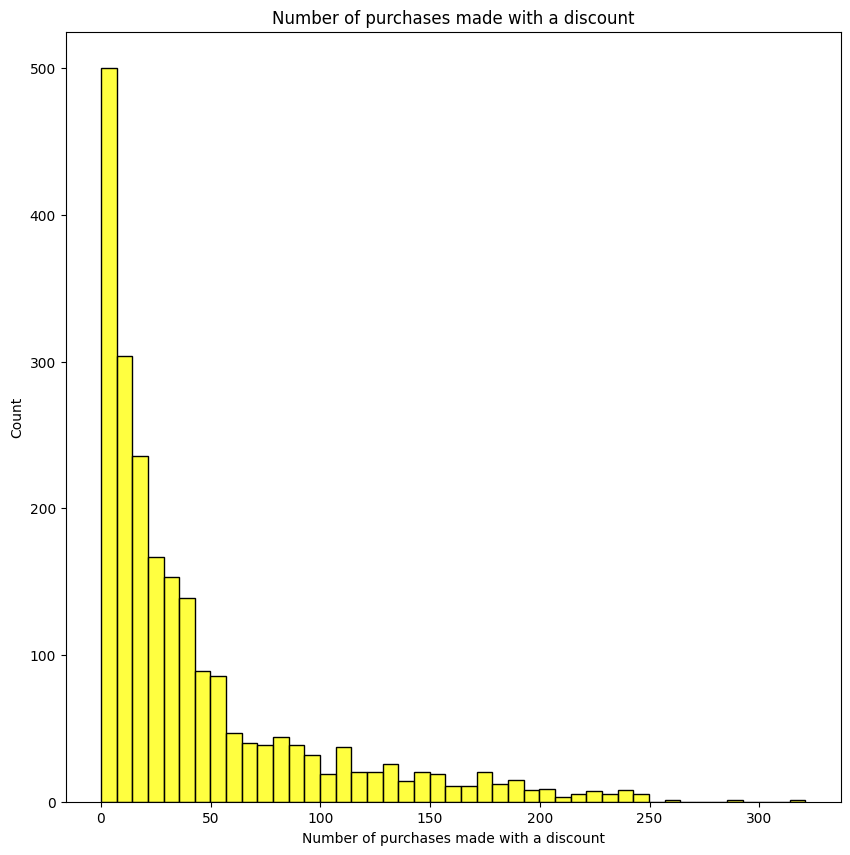

In [94]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='MntGoldProds', color='yellow')
plt.title('Number of purchases made with a discount')
plt.xlabel('Number of purchases made with a discount')
plt.ylabel('Count')
plt.show()

### AcceptedCmp1

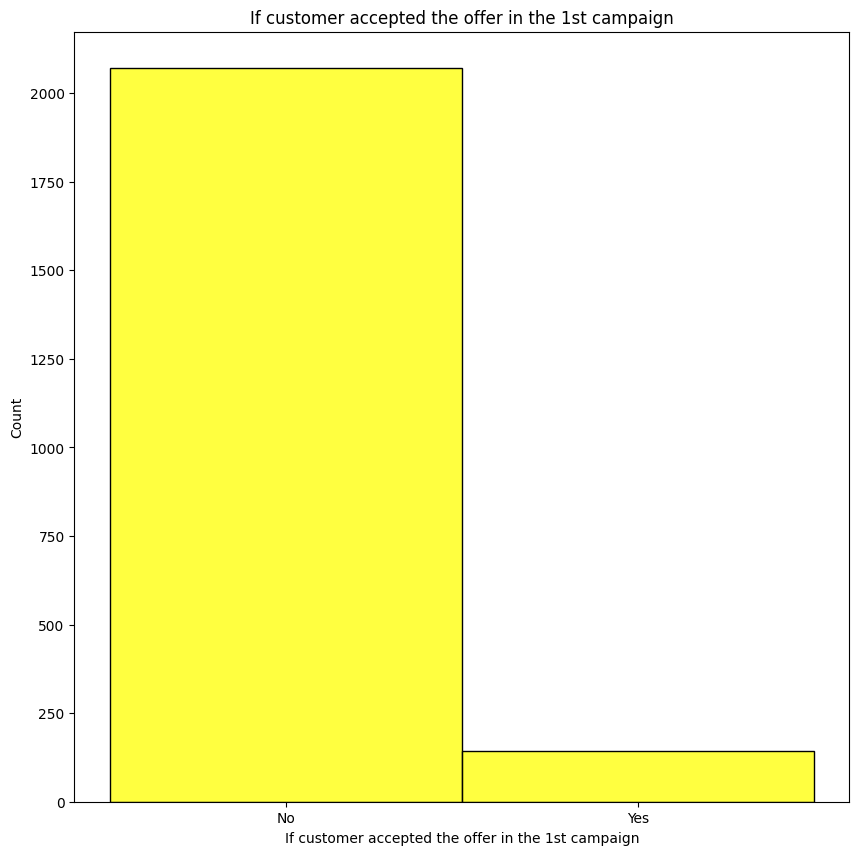

In [131]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='AcceptedCmp1', color='yellow', bins=2, binrange=(-0.5, 1.5))
plt.title('If customer accepted the offer in the 1st campaign')
plt.xlabel('If customer accepted the offer in the 1st campaign')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

### AcceptedCmp2

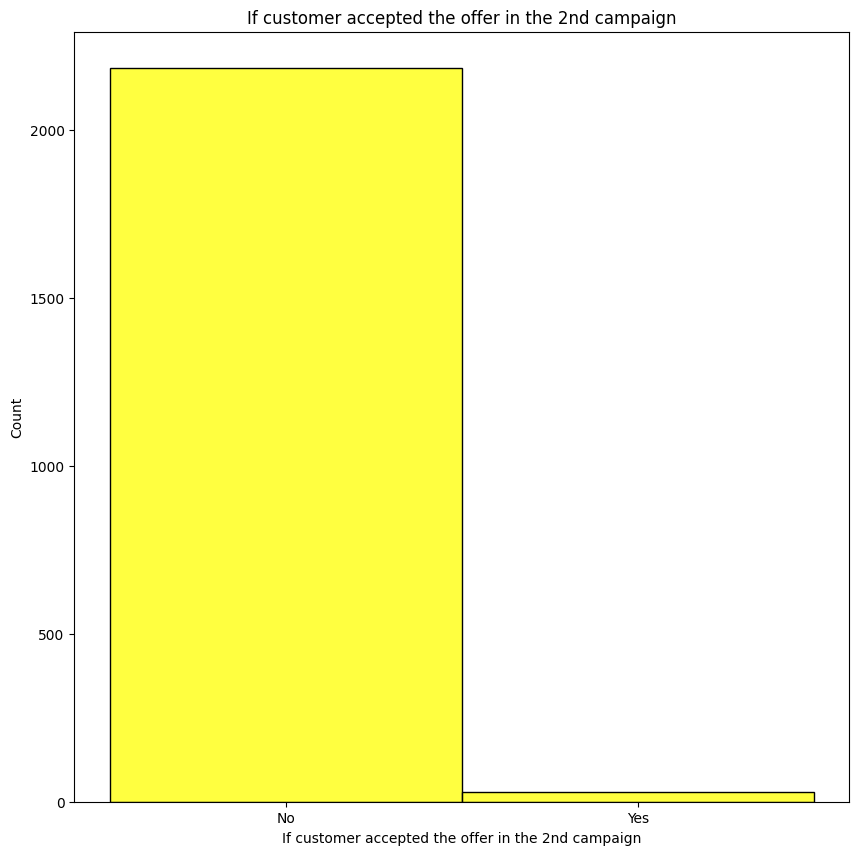

In [127]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='AcceptedCmp2', color='yellow', bins=2, binrange=(-0.5, 1.5))
plt.title('If customer accepted the offer in the 2nd campaign')
plt.xlabel('If customer accepted the offer in the 2nd campaign')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

### AcceptedCmp3

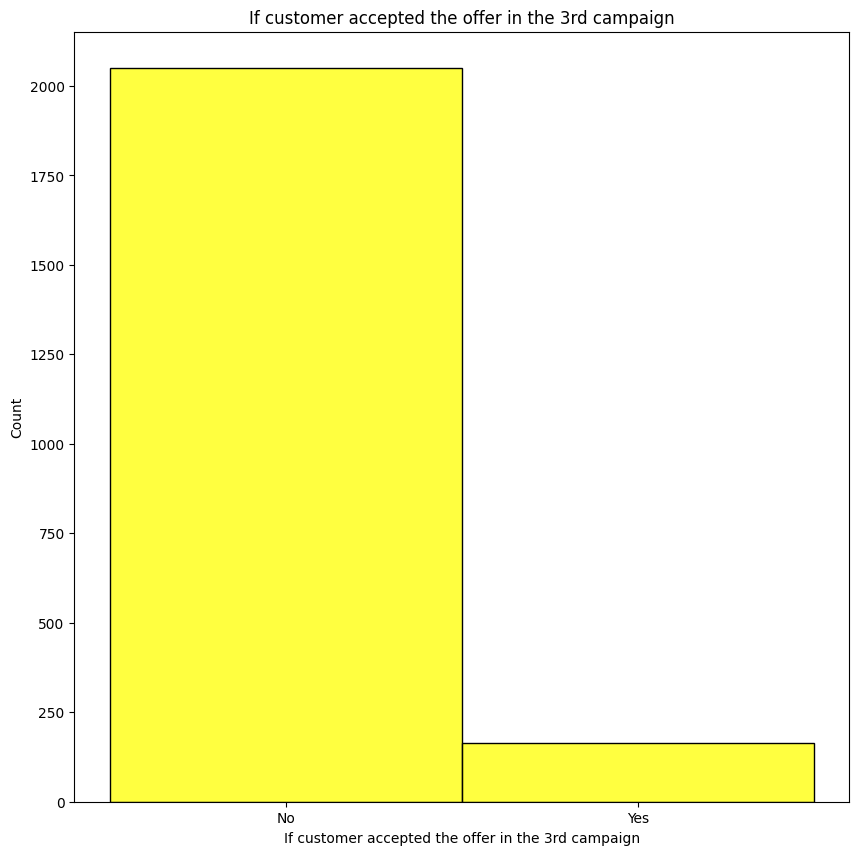

In [133]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='AcceptedCmp3', color='yellow', bins=2, binrange=(-0.5, 1.5))
plt.title('If customer accepted the offer in the 3rd campaign')
plt.xlabel('If customer accepted the offer in the 3rd campaign')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

### AcceptedCmp4

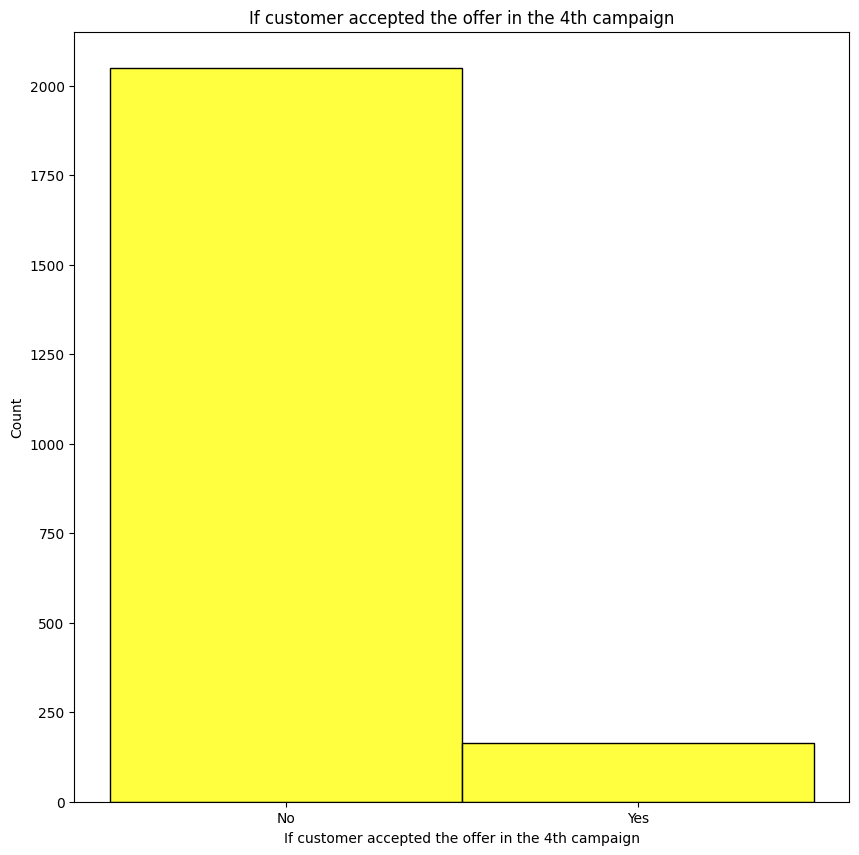

In [134]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='AcceptedCmp4', color='yellow', bins=2, binrange=(-0.5, 1.5))
plt.title('If customer accepted the offer in the 4th campaign')
plt.xlabel('If customer accepted the offer in the 4th campaign')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

### AcceptedCmp5

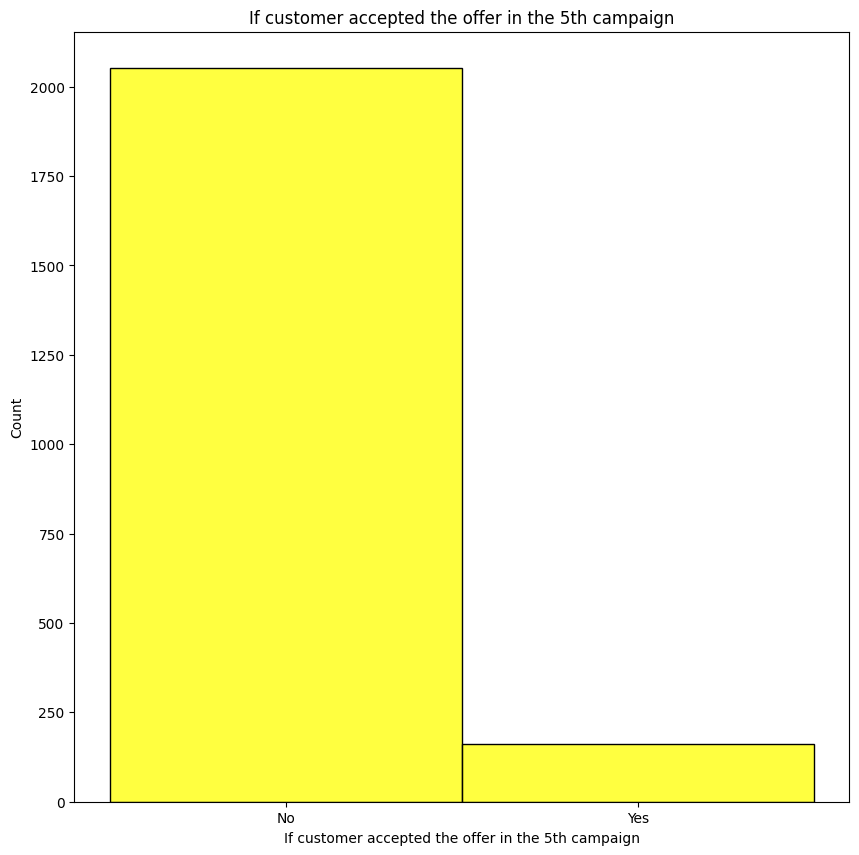

In [135]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='AcceptedCmp5', color='yellow', bins=2, binrange=(-0.5, 1.5))
plt.title('If customer accepted the offer in the 5th campaign')
plt.xlabel('If customer accepted the offer in the 5th campaign')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

### Response

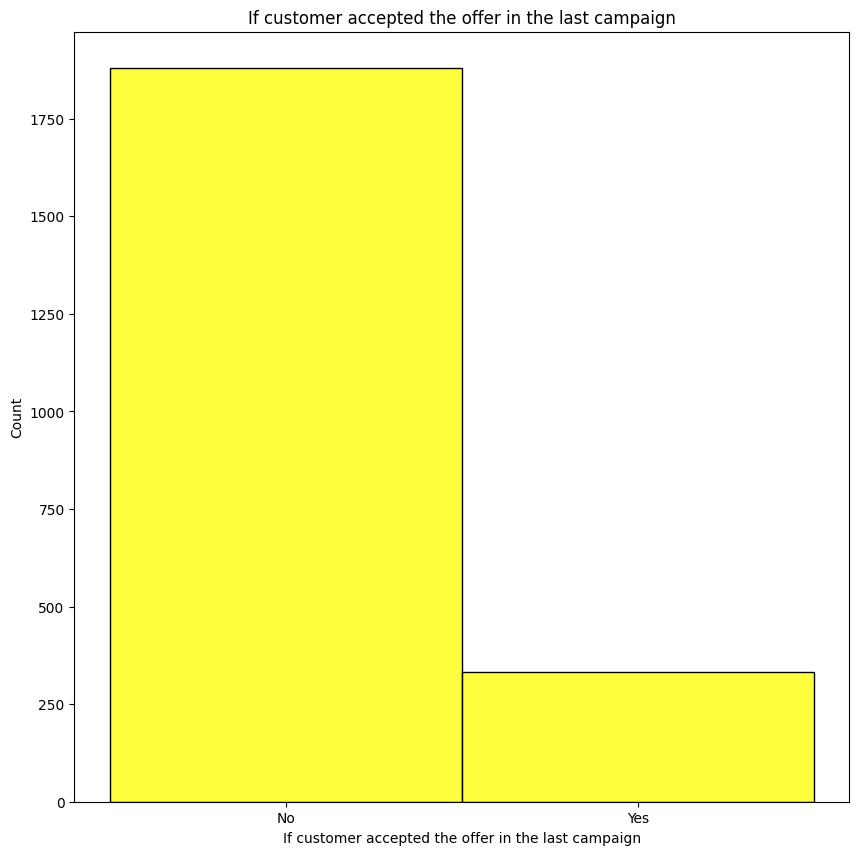

In [137]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='Response', color='yellow', bins=2, binrange=(-0.5, 1.5))
plt.title('If customer accepted the offer in the last campaign')
plt.xlabel('If customer accepted the offer in the last campaign')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [167]:
# Getting the value counts
campaign1_vc = customer_data_ordered['AcceptedCmp1'].value_counts()
campaign2_vc = customer_data_ordered['AcceptedCmp2'].value_counts()
campaign3_vc = customer_data_ordered['AcceptedCmp3'].value_counts()
campaign4_vc = customer_data_ordered['AcceptedCmp4'].value_counts()
campaign5_vc = customer_data_ordered['AcceptedCmp5'].value_counts()
response_vc = customer_data_ordered['Response'].value_counts()

# Concatenating in a new dataframe
campaign_results = pd.concat([campaign1_vc, campaign2_vc, campaign3_vc, campaign4_vc, campaign5_vc, response_vc], axis=1)

# Calculating totals and percentages
campaign_results['Average'] = campaign_results.mean(axis=1)
campaign_results['Percentage'] = round(campaign_results['Average'] / campaign_results['Average'].sum(), 2) * 100
campaign_results.rename(index={0: 'No', 1: 'Yes'}, inplace=True)

In [168]:
campaign_results

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Average,Percentage
No,2070,2182,2049,2048,2051,1879,2046.5,93.0
Yes,142,30,163,164,161,333,165.5,7.0


**Overal the distributions look pretty similar between campaigns, and the average of clients accepting the promotions is about 7%**

## Correlation Matrix

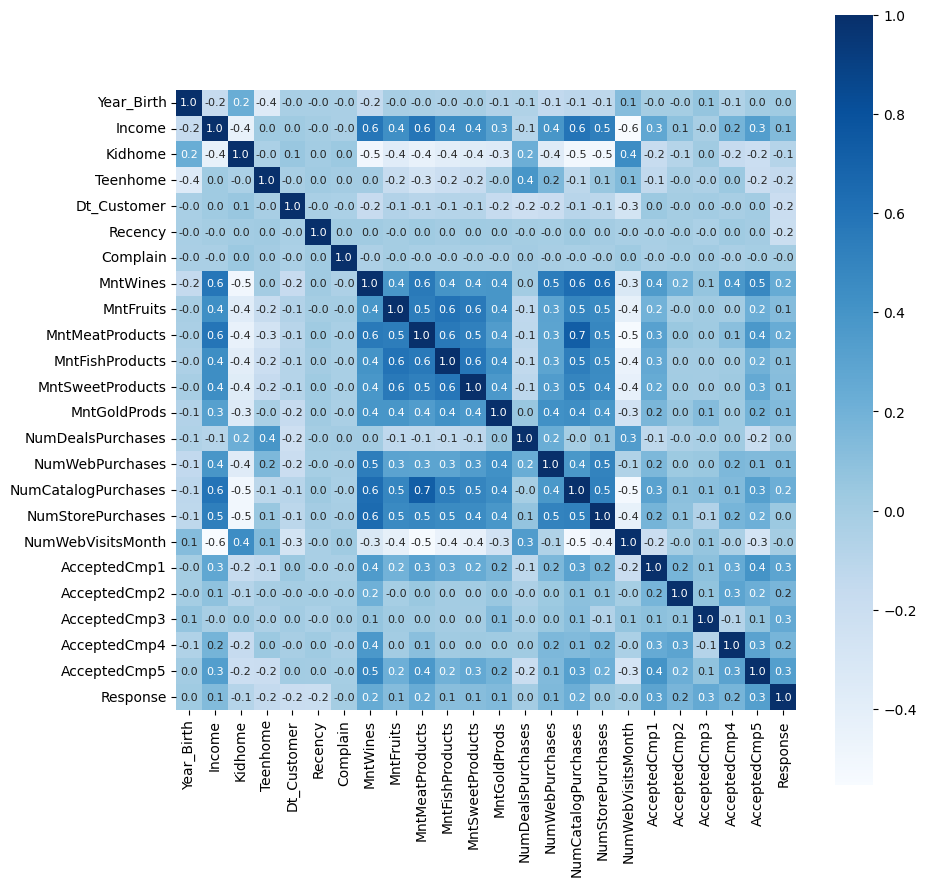

In [32]:
# Constructing heat map
correlation = customer_data_ordered.corr(numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues' )
plt.show()

There seems to be a slight correlation (0.7) between the amount spent on meat products (MntMeatProducts) and the number of purchases made using a catalogue (NumCatalogPurchases), but other than that nothing noticeable.

(2237, 26)